<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnudarshan","key":"1d8ec5f91eb354a34e5f83e7a2d63912"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 669M/675M [00:11<00:00, 78.1MB/s]
100% 675M/675M [00:11<00:00, 61.0MB/s]


In [6]:
from zipfile import ZipFile
file_name = "cell-images-for-detecting-malaria.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
data_path = '/content/cell_images'

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [0]:
from matplotlib.image import imread

In [13]:
os.listdir(data_path)

['cell_images', 'Uninfected', 'Parasitized']

**Data Wrangling**

In [15]:
os.listdir(data_path+'/Parasitized')[0]

'C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [0]:
para_cell = data_path+'/Parasitized'+'/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [19]:
para_cell

'/content/cell_images/Parasitized/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [23]:
imread(para_cell).max() #Imread automatically normalises the image

0.9137255

In [24]:
imread(para_cell).min()

0.0

In [25]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

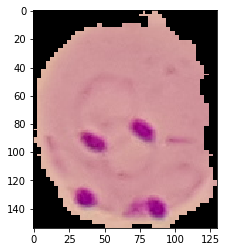

In [26]:
plt.imshow(imread(para_cell))

In [27]:
os.listdir(data_path + '/Uninfected' )[0]

'C164P125ThinF_IMG_20151116_120135_cell_129.png'

In [0]:
uninfected_cell = data_path + '/Uninfected'+'/C164P125ThinF_IMG_20151116_120135_cell_129.png'

In [35]:
uninfected_cell

'/content/cell_images/Uninfected/C164P125ThinF_IMG_20151116_120135_cell_129.png'

In [36]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

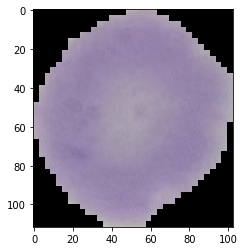

In [39]:
plt.imshow(imread(uninfected_cell))

In [40]:
len(os.listdir(data_path+'/Parasitized'))

13780

In [41]:
len(os.listdir(data_path+'/Uninfected'))

13780

**Calculate the Dimensions**

In [47]:
dim1 = []
dim2 = []

for image_filename in os.listdir(data_path +'/Uninfected'):

  print(image_filename)

Streaming output truncated to the last 5000 lines.
C93P54ThinF_IMG_20150821_162901_cell_51.png
C47P8thinOriginalOlympusCX21_IMG_20150717_173515_cell_93.png
C148P109ThinF_IMG_20151115_112333_cell_211.png
C241NThinF_IMG_20151207_124608_cell_125.png
C79P40ThinF_IMG_20150817_104919_cell_50.png
C179P140ThinF_IMG_20151127_153521_cell_1.png
C75P36_ThinF_IMG_20150815_162935_cell_143.png
C186P147NThinF_IMG_20151203_150859_cell_149.png
C102P63ThinF_IMG_20150918_163054_cell_159.png
C65P26N_ThinF_IMG_20150818_154326_cell_104.png
C158P119ThinF_IMG_20151115_181035_cell_70.png
C217ThinF_IMG_20151106_141500_cell_222.png
C38P3thinF_original_IMG_20150621_112116_cell_129.png
C3thin_original_IMG_20150608_163029_cell_80.png
C232ThinF_IMG_20151112_154424_cell_14.png
C221ThinF_IMG_20151106_160022_cell_76.png
C2NThinF_IMG_20150604_114751_cell_113.png
C121P82ThinF_IMG_20151002_134953_cell_5.png
C238NThinF_IMG_20151207_114653_cell_106.png
C3thin_original_IMG_20150608_163002_cell_88.png
C225ThinF_IMG_20151112_11